<a href="https://colab.research.google.com/github/MatteoGandetto/Corso_ML_con_Python/blob/master/Classificazione_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT LIBRARIES

In [0]:
# package for scientific computing
import numpy as np

#collection of command style functions that make matplotlib work like MATLAB
import matplotlib.pyplot as plt 

#data analysis and manipulation tool
import pandas as pd 

#Python API for Google Sheets
import gspread
from gspread_dataframe import get_as_dataframe, set_with_dataframe

# LOAD DATASET

feature:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 
 classes:  ['setosa' 'versicolor' 'virginica'] 

dimensione features vector (150, 4)
dimensione labels vector (150,)


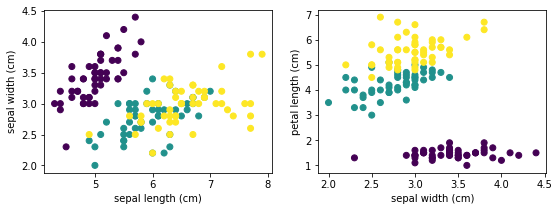

In [2]:
from sklearn import datasets

import matplotlib.pyplot as plt

#load iris dataset
# 3 classes, 4 features,50 samples per features
iris = datasets.load_iris()
#print(iris)

print ('feature: ',iris.feature_names,'\n classes: ',iris.target_names,'\n')
#print(iris.DESCR,'\n')

data = iris.data
labels = iris.target

print('dimensione features vector',data.shape)
print('dimensione labels vector',labels.shape)

fig,ax=plt.subplots(1,2)
fig.set_size_inches(9,3)
for axis,i in zip(ax,range(0,2)):
  axis.scatter(data[:,i],data[:,i+1],c=labels)
  axis.set_xlabel(iris.feature_names[i])
  axis.set_ylabel(iris.feature_names[i+1])

plt.show()




# DATA PREPARATION

In [3]:
#splitting the data into training and test sets 
from sklearn.model_selection import train_test_split

#Optional parameter ‘test-size’ determines the split percentage. 
#‘random_state’ parameter makes the data split the same way every time you run.
X_train,X_test,y_train,y_test = train_test_split(data,labels,test_size=0.4
                                                 ,random_state=4)

#shape of train and test objects
print(X_train.shape)
print(X_test.shape)

# shape of new y objects
print(y_train.shape)
print(y_test.shape)


(90, 4)
(60, 4)
(90,)
(60,)


# DT CLASSIFICATION

Accuracy is 0.9666666666666667


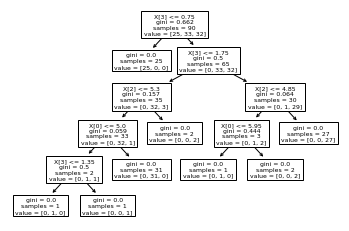

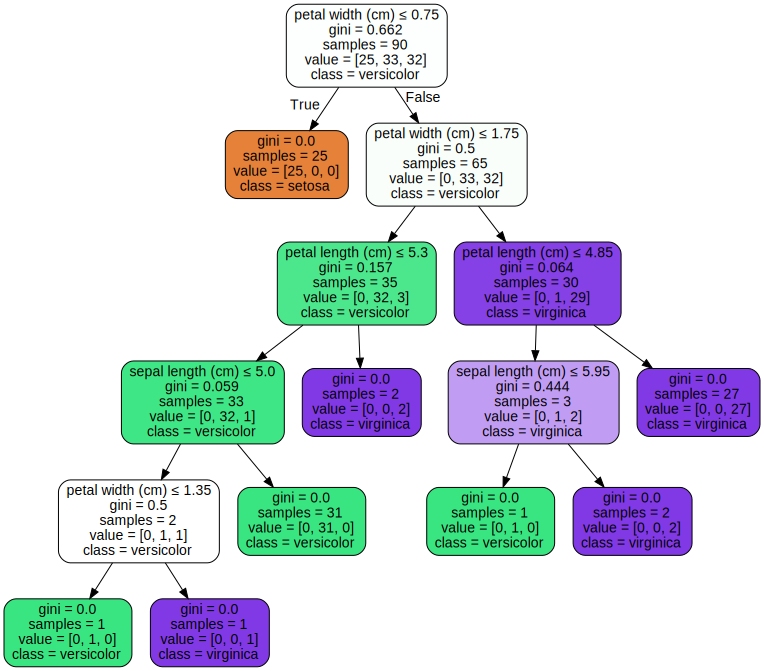

In [4]:
#import the libreary
from sklearn import tree
from sklearn.metrics import accuracy_score

#create an istance of Decision Tree
d_tree = tree.DecisionTreeClassifier(random_state=0)

#train the algorthm 
d_tree = d_tree.fit(X_train, y_train)
y_pred_test = d_tree.predict(X_test)
print(f'Accuracy is {accuracy_score(y_test,y_pred_test)}')

#plot the tree with the plot_tree function:
tree.plot_tree(d_tree) 
plt.show()

#####################################
#other implementation to show the tree
import graphviz 
dot_data = tree.export_graphviz(d_tree, out_file=None,
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names,  
                                filled=True, rounded=True, 
                                special_characters=True)
graph = graphviz.Source(dot_data)  
graph 



# DT CLASSIFICATION - II USE

In [5]:
#import the libreary
from sklearn import tree
from sklearn.model_selection import cross_val_score

#create an istance of Decision Tree
d_tree = tree.DecisionTreeClassifier(random_state=0)

acc=[]
for i in range(1,10):
  d_tree = tree.DecisionTreeClassifier(random_state=0,max_depth=i)
  acc.append(cross_val_score(d_tree, data, labels, cv=10).mean())

print(acc)
print(f'the max accuracy is {max(acc)}')
i_max=acc.index(max(acc))+1
print (f'the max_deph with max accuracy is {i_max}\n')


[0.6666666666666667, 0.9466666666666667, 0.96, 0.9533333333333334, 0.96, 0.96, 0.96, 0.96, 0.96]
the max accuracy is 0.96
the max_deph with max accuracy is 3

